<a href="https://colab.research.google.com/github/juanserrano90/codelatam/blob/main/Training/ViT/Augmented_Data_ViT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://github.com/juanserrano90/codelatam/blob/main/Training/ViT/Augmented_Data_ViT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!git clone https://github.com/juanserrano90/codelatam.git

fatal: destination path 'codelatam' already exists and is not an empty directory.


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Read Data

In [6]:
# read augmented_images folder and create a list of images for each subfolder
import os

image_lists = {}
root_dir = 'codelatam/Data/augmented_images'

for subdir, dirs, files in os.walk(root_dir):
  for file in files:
    if file.endswith(('.jpg', '.jpeg', '.png')):
      subdir_name = os.path.basename(subdir)
      if subdir_name not in image_lists:
        image_lists[subdir_name] = []
      # image_lists[subdir_name].append(os.path.join(subdir, file))
      image_lists[subdir_name].append(file)

# Print the list of images for each subfolder
sum_img = 0
for subdir_name, image_list in image_lists.items():
  sum_img += len(image_list)
  print(f"Subfolder: {subdir_name}, Number of images: {len(image_list)}")
  print(image_list)  # Uncomment to print the full list of images
print(f"Total number of images: {sum_img}")


Subfolder: 1, Number of images: 2385
['sn2008A_4_0_1.0_2531_347_COPY.png', 'sn02cx_4_0_23.0_1884_35_COPY.png', 'sn2005gj_3_0_40.5_69_276_COPY.png', 'sn05gj_3_0_46.254_3048.png', 'sn2002fb_2_0_0.3_3566_211_COPY.png', 'sn05gj_3_0_48.113_3049_430_COPY.png', 'sn2002ic_3_0_31.9_380_347_COPY.png', 'sn2006gz_5_0_-12.3_3273.png', 'sn2005gj_3_0_67.7_78_346_COPY.png', 'sn1999aa_1_0_71.7_3042.png', 'sn2005eq_1_0_-3.5_3603_16_COPY.png', 'sn2005gj_3_0_92.1_81_78_COPY.png', 'sn2005gj_3_0_64.9_75_362_COPY.png', 'sn2005ke_2_0_31.2_1968.png', 'sn2001V_1_0_47.8_2092.png', 'sn2002es_2_0_11.0_2355_55_COPY.png', 'sn1991bg_2_0_28.9_3217_81_COPY.png', 'sn2005gj_3_0_65.8_76_232_COPY.png', 'sn2008R_2_0_5.3_3592.png', 'sn2005ke_2_0_10.4_1963.png', 'sn1999dq_1_0_17.2_1576.png', 'sn2000cx_5_0_13.6_2817_81_COPY.png', 'sn1997br_1_0_37.0_397.png', 'sn1999aa_1_0_54.0_3039.png', 'sn00cx_5_0_61.1_535_70_COPY.png', 'sn2005M_1_0_10.0_2187_20_COPY.png', 'sn08bt_2_0_10.967_117_27_COPY.png', 'sn00cx_5_0_30.4_532_100_COPY.pn

In [7]:
def maping(a):
  subtype_to_category = {0:0, 1:1, 2:1, 3:1, 4:1, 5:1, 6:2, 7:2, 8:2, 9:2, 10:2, 11:2, 12:2, 13:2, 14:2, 15:2, 16:2}
  return subtype_to_category[a]

inv_dict_mapping_classes = {0:'Ia-norm', 1:'Ia-pec', 2:'Others'}


# Checking augmented data

In [8]:
# For each subfolder, separate the images that say COPY in their path from those that do not.
import os

def separate_images_with_copy(images_by_subfolder):
  """
  Separates images in each subfolder based on whether 'COPY' is in their path.

  Args:
    images_by_subfolder: A dictionary where keys are subfolder names and values are lists of image paths.

  Returns:
    A dictionary with the same subfolder keys, but values are now dictionaries
    containing 'with_copy' and 'without_copy' lists of images.
  """
  separated_images = {}
  for subfolder, image_list in images_by_subfolder.items():
    with_copy = []
    without_copy = []
    for image_path in image_list:
      if 'COPY' in image_path:
        if subfolder == '1':  # FIX 1: there is a problem with the SN labeling
          str_list = image_path.split("_")
          with_copy.append("_".join(str_list[:-3])) # remove the copy counter and the .png string
        else:
          str_list = image_path.split("_")
          if any(ele in str_list[1] for ele in ['6', '8', '10', '11', '16']): # FIX 2: There are categories labeled as copies (even though they are not)
            without_copy.append("_".join(str_list[:-2]))
          else:
            with_copy.append("_".join(str_list[:-2])) # remove the copy counter and the .png string
      else:
        str_list = image_path.split("_")
        without_copy.append("_".join(str_list[:-1]))
    separated_images[subfolder] = {'with_copy': with_copy, 'without_copy': without_copy}
  return separated_images

separated_images = separate_images_with_copy(image_lists)

for subfolder, image_dict in separated_images.items():
  print(f"Subfolder: {subfolder}")
  print(f"  Copied images: {len(image_dict['with_copy'])}")
  # Uncomment to print the list of images with 'COPY'
  print(f"    Image list: {image_dict['with_copy']}")
  print(f"  Original images: {len(image_dict['without_copy'])}")
  # Uncomment to print the list of images without 'COPY'
  print(f"    Image list: {image_dict['without_copy']}")


Subfolder: 1
  Copied images: 1484
    Image list: ['sn2008A_4_0_1.0', 'sn02cx_4_0_23.0', 'sn2005gj_3_0_40.5', 'sn2002fb_2_0_0.3', 'sn05gj_3_0_48.113', 'sn2002ic_3_0_31.9', 'sn2005gj_3_0_67.7', 'sn2005eq_1_0_-3.5', 'sn2005gj_3_0_92.1', 'sn2005gj_3_0_64.9', 'sn2002es_2_0_11.0', 'sn1991bg_2_0_28.9', 'sn2005gj_3_0_65.8', 'sn2000cx_5_0_13.6', 'sn00cx_5_0_61.1', 'sn2005M_1_0_10.0', 'sn08bt_2_0_10.967', 'sn00cx_5_0_30.4', 'sn91bg_2_0_117.2', 'sn2007if_5_0_28.0', 'sn2005gj_3_0_38.5', 'sn2002ic_3_0_65.6', 'sn2000cx_5_0_18.6', 'sn1999dq_1_0_0.4', 'sn05gj_3_0_48.113', 'sn2005gj_3_0_65.8', 'sn2005hk_4_0_14.4', 'sn1986G_2_0_102.6', 'sn2002ic_3_0_31.9', 'sn2005hk_4_0_23.4', 'sn2002cx_4_0_24.0', 'sn2007if_5_0_5.6', 'sn2000cx_5_0_70.1', 'sn1991bg_2_0_18.3', 'sn2007if_5_0_28.0', 'sn05hk_4_0_23.398', 'sn2005hk_4_0_-7.3', 'sn2003fa_1_0_11.6', 'sn2005hk_4_0_-7.3', 'sn2005ke_2_0_2.4', 'sn2005gj_3_0_-12.1', 'sn2007if_5_0_61.4', 'sn2007if_5_0_56.7', 'sn2002fb_2_0_17.0', 'sn2005gj_3_0_27.3', 'sn2000cx_5_0_29

In [9]:
# for each 'without_copy' string, count how many strings are repeated in 'with_copy'
import collections

count_dict = {}

for subfolder, image_dict in separated_images.items():
  without_copy_list = image_dict['without_copy']
  with_copy_list = image_dict['with_copy']

  for image_without_copy in without_copy_list:
    count = with_copy_list.count(image_without_copy)
    if image_without_copy not in count_dict:
      count_dict[image_without_copy] = count
    else:
      count_dict[image_without_copy] += count

# create a pandas dataframe using count_dict
import pandas as pd

df = pd.DataFrame(list(count_dict.items()), columns=['Image', 'Copies'])
df['Category'] = df['Image'].str.split('_').str[1]
print(df)


                   Image  Copies Category
0      sn05gj_3_0_46.254      11        3
1     sn2006gz_5_0_-12.3       6        5
2      sn1999aa_1_0_71.7       0        1
3      sn2005ke_2_0_31.2       1        2
4       sn2001V_1_0_47.8       0        1
...                  ...     ...      ...
4312      sn89B_0_0_20.4       0        0
4313    sn2003iv_0_0_7.2       0        0
4314   sn2004gs_0_0_-3.2       0        0
4315    sn2001ep_0_0_7.8       0        0
4316   sn1998ec_0_0_38.2       0        0

[4317 rows x 3 columns]


In [10]:
SNsubtype_original = {i: 0 for i in range(0, 17)}
SNsubtype_copies = {i: 0 for i in range(0, 17)}
SNsubtype_total = {i: 0 for i in range(0, 17)}

for subfolder, image_dict in separated_images.items():
  without_copy_list = image_dict['without_copy']
  with_copy_list = image_dict['with_copy']

  for image_name in without_copy_list:
    if int(image_name.split('_')[1]) in SNsubtype_original:
      SNsubtype_original[int(image_name.split('_')[1])] += 1

  for image_name in with_copy_list:
    if int(image_name.split('_')[1]) in SNsubtype_copies:
      SNsubtype_copies[int(image_name.split('_')[1])] += 1

  for key,value in SNsubtype_total.items():
    SNsubtype_total[key] = SNsubtype_original[key] + SNsubtype_copies[key]

In [11]:
# convert SNsubtype_original, SNsubtype_copies and SNsubtype_total to a one pandas dataframe
#   where the columns labels are N° originals, N° copies and N° total respectively
#   and each row label is the key of the dictionary

import pandas as pd
id_to_subtype = {0: 'Ia-norm',
 1: 'Ia-91T',
 3: 'Ia-csm',
 2: 'Ia-91bg',
 6: 'Ib-norm',
 4: 'Iax',
 5: 'Ia-pec',
 10: 'Ic-norm',
 13: 'IIP',
 14: 'IIL',
 8: 'IIb',
 16: 'II-pec',
 11: 'Ic-broad',
 12: 'Ic-pec',
 15: 'IIn',
 7: 'Ibn',
 9: 'Ib-pec'}

# Create a list of dictionaries, where each dictionary represents a row
rows = []
for key in SNsubtype_original:
  row = {
      'N° originals': SNsubtype_original[key],
      'N° copies': SNsubtype_copies[key],
      'N° total': SNsubtype_total[key]
  }
  rows.append(row)

# Create the DataFrame from the list of dictionaries
df = pd.DataFrame(rows, index=SNsubtype_original.keys())
df.index.name = "ID"
df['Category'] = df.index.map(maping)
df['Subtype'] = df.index.map(id_to_subtype)
df = df[['Category', 'Subtype', 'N° originals', 'N° copies', 'N° total']]
print(df)

    Category   Subtype  N° originals  N° copies  N° total
ID                                                       
0          0   Ia-norm          2387          0      2387
1          1    Ia-91T           398         79       477
2          1   Ia-91bg           264        213       477
3          1    Ia-csm            30        447       477
4          1       Iax            68        409       477
5          1    Ia-pec           141        336       477
6          2   Ib-norm           217          0       217
7          2       Ibn            31        186       217
8          2       IIb           217          0       217
9          2    Ib-pec            15        202       217
10         2   Ic-norm           217          0       217
11         2  Ic-broad           217          0       217
12         2    Ic-pec            33        184       217
13         2       IIP           176         41       217
14         2       IIL            13        204       217
15         2  

In [12]:
# for each category, show the row sum of the column "N° total"
category_total = df.groupby('Category')['N° total'].sum()
print(category_total)


Category
0    2387
1    2385
2    2387
Name: N° total, dtype: int64


In [13]:
# # prompt: use image_lists to create one train, validation and test dataset from each subfolder

# import random

# def create_train_val_test_splits(image_lists, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15):
#   """
#   Creates train, validation, and test splits for images in each subfolder.

#   Args:
#     image_lists: A dictionary where keys are subfolder names and values are lists of image paths.
#     train_ratio: The proportion of images to include in the training set.
#     val_ratio: The proportion of images to include in the validation set.
#     test_ratio: The proportion of images to include in the test set.

#   Returns:
#     A dictionary with subfolder names as keys and values as dictionaries containing 'train', 'val', and 'test' lists of images.
#   """

#   splits = {}
#   for subfolder, image_list in image_lists.items():
#     num_images = len(image_list)
#     num_train = int(num_images * train_ratio)
#     num_val = int(num_images * val_ratio)
#     num_test = num_images - num_train - num_val

#     random.shuffle(image_list)  # Shuffle the image list for random splitting
#     train_images = image_list[:num_train]
#     val_images = image_list[num_train:num_train + num_val]
#     test_images = image_list[num_train + num_val:]

#     splits[subfolder] = {'train': train_images, 'val': val_images, 'test': test_images}

#   return splits


# # Create the train, validation, and test splits
# splits = create_train_val_test_splits(image_lists)

# # Print the number of images in each split for each subfolder
# for key,value in splits.items():
#   print(f"{key}:{value}")


# Create train/val/test without repeating unique SNs in different splits

In [99]:
# prompt: but all files which start with the same name must be in the same split

import collections
import random

def create_train_val_test_splits(image_lists, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15):
  """
  Creates train, validation, and test splits for images in each subfolder,
  ensuring that images with the same base name are not repeated across splits.

  Args:
    image_lists: A dictionary where keys are subfolder names and values are lists of image paths.
    train_ratio: The proportion of images to include in the training set.
    val_ratio: The proportion of images to include in the validation set.
    test_ratio: The proportion of images to include in the test set.

  Returns:
    A dictionary with subfolder names as keys and values as dictionaries containing 'train', 'val', and 'test' lists of images.
  """

  splits = {}
  for subfolder, image_list in image_lists.items():
    num_images = len(image_list)
    num_train = int(num_images * train_ratio)
    num_val = int(num_images * val_ratio)
    num_test = num_images - num_train - num_val

    random.shuffle(image_list)  # Shuffle the image list for random splitting

    # Extract base names to avoid duplicates
    base_names = {}  # Use a dictionary to store the split assignment for each base name
    train_images = []
    val_images = []
    test_images = []
    for image_path in image_list:
      base_name = image_path.split('_')[0]  # Names are separated by "_"
      if base_name not in base_names:
        # Assign the base name to a split randomly
        rand_val = random.random()
        if rand_val < train_ratio:
          base_names[base_name] = 'train'
        elif rand_val < train_ratio + val_ratio:
          base_names[base_name] = 'val'
        else:
          base_names[base_name] = 'test'

      if base_names[base_name] == 'train' and len(train_images) < num_train:
        train_images.append(image_path)
      elif base_names[base_name] == 'val' and len(val_images) < num_val:
        val_images.append(image_path)
      elif base_names[base_name] == 'test' and len(test_images) < num_test:
        test_images.append(image_path)
      else:
        if base_names[base_name] == 'train':
          train_images.append(image_path)
        elif base_names[base_name] == 'val':
          val_images.append(image_path)
        elif base_names[base_name] == 'test':
          test_images.append(image_path)

    splits[subfolder] = {'train': train_images, 'val': val_images, 'test': test_images}

  return splits

In [95]:
# Keep trying splits until the ratios are within the tolerance.
while True:
  splits = create_train_val_test_splits(image_lists)
  tolerance = 0.03
  a = []
  b = []
  c = []
  for i in range(3):
    subtotal = len(splits[str(i)]['train'])+len(splits[str(i)]['val'])+len(splits[str(i)]['test'])
    a.append(round(len(splits[str(i)]['train'])/subtotal,2))
    b.append(round(len(splits[str(i)]['val'])/subtotal,2))
    c.append(round(len(splits[str(i)]['test'])/subtotal,2))
  if abs(a[0]-0.7) < tolerance and abs(b[0]-0.15) < tolerance and abs(c[0]-0.15) < tolerance and abs(a[1]-0.7) < tolerance and abs(b[1]-0.15) < tolerance and abs(c[1]-0.15) < tolerance and abs(a[2]-0.7) < tolerance and abs(b[2]-0.15) < tolerance and abs(c[2]-0.15) < tolerance:
      good_split = splits
      break

# Print the number of images in each split for each subfolder
for key, value in splits.items():
  print(f"{key}: {value}")

In [108]:
import pickle
# save the dictionary to a file to recover the same split later (because it's random everytime)

# with open('drive/MyDrive/lssds24/codelatam/saved_splits_4.pkl', 'wb') as f:
#     pickle.dump(splits, f)

In [106]:
# load the saved split dictionary
# el archivo 'saved_splits.pkl' se puede cargar de mi google drive (juan)
# https://drive.google.com/drive/folders/1I9gk_JM-oFOD4xplydMrtrNrqHZeU0Jo?usp=sharing
# splits saved: [saved_splits.pkl, saved_splits_2.pkl, saved_splits_3.pkl, saved_splits_4.pkl]
with open('drive/MyDrive/lssds24/codelatam/saved_splits.pkl', 'rb') as f:
    splits = pickle.load(f)

In [107]:
# check the number of images in each split
total = 0
print('images per split:')
for i in range(3):
  print(len(splits[str(i)]['train']), len(splits[str(i)]['val']), len(splits[str(i)]['test']))
  total += len(splits[str(i)]['train']) + len(splits[str(i)]['val']) + len(splits[str(i)]['test'])
print('----------------')
print('total images:', total)
# proportions
print('----------------')
print('proportions:')
for i in range(3):
  subtotal = len(splits[str(i)]['train'])+len(splits[str(i)]['val'])+len(splits[str(i)]['test'])
  print(round(len(splits[str(i)]['train'])/subtotal,2), round(len(splits[str(i)]['val'])/subtotal,2), round(len(splits[str(i)]['test'])/subtotal,2))

images per split:
1663 327 397
1723 363 299
1662 413 312
----------------
total images: 7159
----------------
proportions:
0.7 0.14 0.17
0.72 0.15 0.13
0.7 0.17 0.13


In [83]:
# count how many images are in image_lists
total_images = sum(len(images) for images in image_lists.values())
print(f"Total number of images in image_lists: {total_images}")

Total number of images in image_lists: 7159


# Prepare data for modeling

In [18]:
import torch
from torchvision.io import read_image, ImageReadMode

train_data = {'id': [], 'pixel_values': [], 'y_true': []}
val_data = {'id': [], 'pixel_values': [], 'y_true': []}
test_data = {'id': [], 'pixel_values': [], 'y_true': []}

for subfolder, split_dict in splits.items():
  for split, image_list in split_dict.items():
    if split == 'train':
      for image_name in image_list:
        train_data['id'].append(image_name[:-4]) # remove the '.png' string
        train_data['pixel_values'].append(read_image(os.path.join(root_dir, subfolder, image_name), mode=ImageReadMode.RGB))
        train_data['y_true'].append(maping(int(image_name.split('_')[1])))
    elif split == 'val':
      for image_name in image_list:
        val_data['id'].append(image_name[:-4]) # remove the '.png' string
        val_data['pixel_values'].append(read_image(os.path.join(root_dir, subfolder, image_name), mode=ImageReadMode.RGB))
        val_data['y_true'].append(maping(int(image_name.split('_')[1])))
    elif split == 'test':
      for image_name in image_list:
        test_data['id'].append(image_name[:-4]) # remove the '.png' string
        test_data['pixel_values'].append(read_image(os.path.join(root_dir, subfolder, image_name), mode=ImageReadMode.RGB))
        test_data['y_true'].append(maping(int(image_name.split('_')[1])))


# stack 'pixel_values' list of tensors to a 4D tensor
train_data['pixel_values'] = torch.stack(train_data['pixel_values'])
train_data['y_true'] = torch.tensor(train_data['y_true'])

val_data['pixel_values'] = torch.stack(val_data['pixel_values'])
val_data['y_true'] = torch.tensor(val_data['y_true'])

test_data['pixel_values'] = torch.stack(test_data['pixel_values'])
test_data['y_true'] = torch.tensor(test_data['y_true'])

train_data['pixel_values'] = train_data['pixel_values'].permute(0, 2, 3, 1)
val_data['pixel_values'] = val_data['pixel_values'].permute(0, 2, 3, 1)
test_data['pixel_values'] = test_data['pixel_values'].permute(0, 2, 3, 1)

In [19]:
from torch.utils.data import DataLoader
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, data):
        self.ids = data['id']
        self.pixel_values = data['pixel_values'].float()
        self.y_true = data['y_true'].long()

    def __len__(self):
        return len(self.ids)

    def __getitem__(self, idx):
        return {
            'id': self.ids[idx],
            'pixel_values': self.pixel_values[idx],
            'y_true': self.y_true[idx]
        }

train_dataset = CustomDataset(train_data)
val_dataset = CustomDataset(val_data)
test_dataset = CustomDataset(test_data)

# Finetuning ViT

In [20]:
!pip install -q transformers torchmetrics torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.6/890.6 kB 21.3 MB/s eta 0:00:00


## Load pretrained model

In [21]:
import torch.nn as nn
from transformers import ViTImageProcessor, ViTModel

num_classes = len(torch.unique(train_data['y_true']))
num_classes

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

pt_model_name = 'google/vit-base-patch32-224-in21k'
processor = ViTImageProcessor.from_pretrained(pt_model_name)
model = ViTModel.from_pretrained(pt_model_name).to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/352M [00:00<?, ?B/s]

## Define train/validate/predict steps

In [22]:
import torch.nn.functional as F

def train_step(batch_data, model, processor, classifier, optimizer, device):
    model.train()
    y_true = batch_data['y_true'].to(device)

    inputs = processor(images=batch_data['pixel_values'], return_tensors="pt").to(device)
    outputs = model(**inputs)
    pooled_output = outputs.last_hidden_state[:, 0, :]

    logits = classifier(pooled_output)
    loss = F.cross_entropy(logits, y_true)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    y_pred = torch.argmax(logits, dim=-1)
    return loss.item(), y_pred, y_true


def validate_step(batch_data, model, processor, classifier, device):
    model.eval()
    with torch.no_grad():
        y_true = batch_data['y_true'].to(device)

        inputs = processor(images=batch_data['pixel_values'], return_tensors="pt").to(device)
        outputs = model(**inputs)
        pooled_output = outputs.last_hidden_state[:, 0, :]

        logits = classifier(pooled_output)
        loss = F.cross_entropy(logits, y_true)

        y_pred = torch.argmax(logits, dim=-1)
        return loss.item(), y_pred, y_true


def predict_step(batch_data, model, processor, classifier, device):
    model.eval()
    with torch.no_grad():
        y_true = batch_data['y_true'].to(device)

        inputs = processor(images=batch_data['pixel_values'], return_tensors="pt").to(device)
        outputs = model(**inputs)
        pooled_output = outputs.last_hidden_state[:, 0, :]

        logits = classifier(pooled_output)
        y_pred_prob = F.softmax(logits, dim=1)
        y_pred = torch.argmax(logits, dim=-1)

        return {
            'id': batch_data['id'],
            'y_pred': y_pred.cpu().numpy(),
            'y_pred_prob': y_pred_prob.cpu().numpy(),
            'y_true': y_true.cpu().numpy()
        }

## Train model

In [23]:
from torch.optim import AdamW
from torch.utils.tensorboard import SummaryWriter
from tqdm import tqdm
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

In [27]:
# # classifier
lr = 1e-5
batch_size = 64
dropout = 0.6
wd = 1e-4

classifier = nn.Sequential(
    nn.Linear(model.config.hidden_size, 512),
    nn.ReLU(),
    nn.Dropout(0.3),  # Increased dropout rate to 0.3
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Dropout(0.3),  # Added another dropout layer with a dropout rate of 0.3
    nn.Linear(256, num_classes)
).to(device)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

In [25]:
# Define search ranges
learning_rates = [3e-6, 1e-5, 3e-5, 1e-4] # we were using 2e-5 initially
dropout_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
batch_sizes = [16, 32, 64]
weight_decays = [1e-5, 1e-4, 5e-4, 1e-3, 5e-3]

In [26]:
from itertools import product

# I searched first the best lr and batch size using a dropout of 0.3
# best val accuracy was with batch_size = 64, lr = 1e-5
# now search for best dropout
# found best dropout at 0.6
# now train with the best hyperparameters
lr = 1e-5
batch_size = 64
dropout = 0.6
wd = 1e-4

plots_dict = {}
search_dict = {}

# hyperparameter grid search
# for wd in weight_decays:
print(f"Training with learning rate={lr}, dropout={dropout}, batch size={batch_size}, weight decay={wd}")

classifier = nn.Sequential(
  nn.Linear(model.config.hidden_size, 512),
  nn.ReLU(),
  nn.Dropout(dropout),  # Increased dropout rate to 0.3
  nn.Linear(512, 256),
  nn.ReLU(),
  nn.Dropout(dropout),  # Added another dropout layer with a dropout rate of 0.3
  nn.Linear(256, num_classes)
  ).to(device)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

# writer = SummaryWriter()
epochs = 100
learning_rate = lr # initially we were using 2e-5
patience = 7
patience_counter = 0

params = list(model.parameters()) + list(classifier.parameters())
optimizer = AdamW(params, lr=learning_rate, weight_decay=wd) # initially we were using 1e-4

# save for ploting
t_loss = []
t_acc = []
t_f1 = []
v_loss = []
v_acc = []
v_f1 = []

best_val_loss = float('inf')
best_model_state = None
for epoch in range(epochs):
  train_losses = []
  train_y_true = []
  train_y_pred = []

  for batch_data in tqdm(train_dataloader, desc=f"Epoch {epoch + 1}/{epochs}"):
    loss, y_pred, y_true = train_step(batch_data, model, processor, classifier, optimizer, device)
    train_losses.append(loss)
    train_y_true.extend(y_true.cpu().numpy())
    train_y_pred.extend(y_pred.cpu().numpy())

  train_loss = np.mean(train_losses)
  train_acc = accuracy_score(train_y_true, train_y_pred)
  train_f1 = f1_score(train_y_true, train_y_pred, average='macro')

  val_losses = []
  val_y_true = []
  val_y_pred = []

  for batch_data in val_dataloader:
    loss, y_pred, y_true = validate_step(batch_data, model, processor, classifier, device)
    val_losses.append(loss)
    val_y_true.extend(y_true.cpu().numpy())
    val_y_pred.extend(y_pred.cpu().numpy())

  val_loss = np.mean(val_losses)
  val_acc = accuracy_score(val_y_true, val_y_pred)
  val_f1 = f1_score(val_y_true, val_y_pred, average='macro')

    # writer.add_scalar('Loss/train', train_loss, epoch)
    # writer.add_scalar('Loss/val', val_loss, epoch)
    # writer.add_scalar('Accuracy/train', train_acc, epoch)
    # writer.add_scalar('Accuracy/val', val_acc, epoch)
    # writer.add_scalar('F1-Score/train', train_f1, epoch)
    # writer.add_scalar('F1-Score/val', val_f1, epoch)

  t_loss.append(train_loss)
  t_acc.append(train_acc)
  t_f1.append(train_f1)
  v_loss.append(val_loss)
  v_acc.append(val_acc)
  v_f1.append(val_f1)
  print(f"Epoch {epoch + 1}/{epochs}")
  print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}, Train F1: {train_f1:.4f}")
  print(f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.4f}, Val F1: {val_f1:.4f}")

  if val_loss < best_val_loss:
    best_val_loss = val_loss
    patience_counter = 0  # Restablecer el contador de paciencia
    best_model_state = {
        'model': model.state_dict(),
        'classifier': classifier.state_dict(),
        'optimizer': optimizer.state_dict(),
        'epoch': epoch
    }
  else:
    patience_counter += 1

  if patience_counter >= patience:
    print(f"Early stopping triggered. No improvement in validation loss for {patience} epochs.")
    break

  # if train_acc > 0.99:
  #   patience_counter += 1

  # if patience_counter >= 4:
  #   print(f"Early stopping triggered. 100% train accuracy")
  #   break

plots_dict[f"lr_{lr}_dropout_{dropout}_batch_size={batch_size}_wd_{wd}"] = [t_loss, t_acc, t_f1, v_loss, v_acc, v_f1]

# search_dict[f"lr_{lr}_dropout_{dropout}_batch_size={batch_size}_wd_{wd}"] = {
#       'train_loss': t_loss,
#       'train_acc': t_acc,
#       'train_f1': t_f1,]
#       'val_loss': v_loss,
#       'val_acc': v_acc,
#       'val_f1': v_f1}

# del train_dataloader, val_dataloader, test_dataloader, classifier, optimizer

#torch.save(best_model_state, 'drive/MyDrive/lssds24/codelatam/best_model.pth')
# writer.close()

Training with learning rate=1e-05, dropout=0.6, batch size=64, weight decay=0.0001


Epoch 1/100: 100%|██████████| 76/76 [00:52<00:00,  1.44it/s]


Epoch 1/100
Train Loss: 1.0806, Train Accuracy: 0.4490, Train F1: 0.4130
Val Loss: 1.0588, Val Accuracy: 0.5308, Val F1: 0.5010


Epoch 2/100: 100%|██████████| 76/76 [00:52<00:00,  1.45it/s]


Epoch 2/100
Train Loss: 0.9937, Train Accuracy: 0.6447, Train F1: 0.6029
Val Loss: 0.9647, Val Accuracy: 0.6184, Val F1: 0.6005


Epoch 3/100:  91%|█████████ | 69/76 [00:48<00:04,  1.41it/s]


KeyboardInterrupt: 

In [ ]:
# # save dict of the last run for ploting
# with open('drive/MyDrive/lssds24/codelatam/plot_results.pkl', 'wb') as f:
#     pickle.dump(plots_dict, f)

## Search Results

In [ ]:
# save search results
# with open('drive/MyDrive/lssds24/codelatam/saved_search_results_4.pkl', 'wb') as f:
#     pickle.dump(search_dict, f)

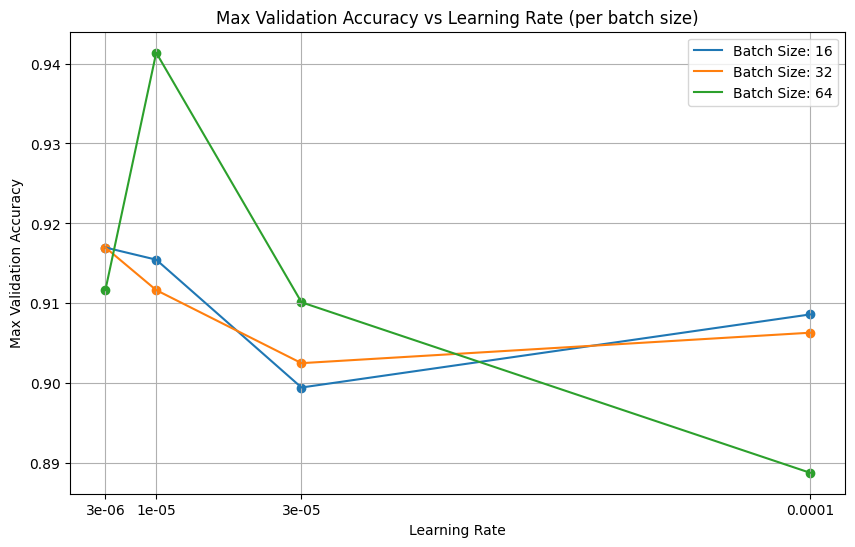

In [ ]:
# plot max val accuracy vs learning rate and batch size
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# Load the search results from the pickle file
with open('drive/MyDrive/lssds24/codelatam/saved_search_results_1.pkl', 'rb') as f:
    search_dict = pickle.load(f)

# Create a plot for each batch size
plt.figure(figsize=(10, 6))

for batch_size in set(int(key.split('=')[1]) for key in search_dict):
  # Extract learning rates and max validation accuracies for the current batch size
  lrates = []
  max_val_accuracies = []
  for key, value in search_dict.items():
    if int(key.split('=')[1]) == batch_size:
      lr = float(key.split('_')[1])
      max_val_acc = max(value['val_acc'])
      lrates .append(lr)
      max_val_accuracies.append(max_val_acc)

  # Sort learning rates and corresponding accuracies
  sorted_indices = sorted(range(len(lrates )), key=lambda i: lrates [i])
  lrates  = [lrates [i] for i in sorted_indices]
  max_val_accuracies = [max_val_accuracies[i] for i in sorted_indices]
  plt.plot(lrates , max_val_accuracies, label=f'Batch Size: {batch_size}')
  plt.scatter(lrates , max_val_accuracies)

ticklabels = []
for i in lrates:
  ticklabels.append(str(i))
plt.xticks(lrates, ticklabels)
plt.xlabel('Learning Rate')
plt.xticks(lrates)
plt.ylabel('Max Validation Accuracy')
plt.title('Max Validation Accuracy vs Learning Rate (per batch size)')
plt.legend()
plt.grid(True)
plt.savefig('drive/MyDrive/lssds24/codelatam/max_val_acc_vs_lr.png', dpi=200, bbox_inches='tight')
plt.show()

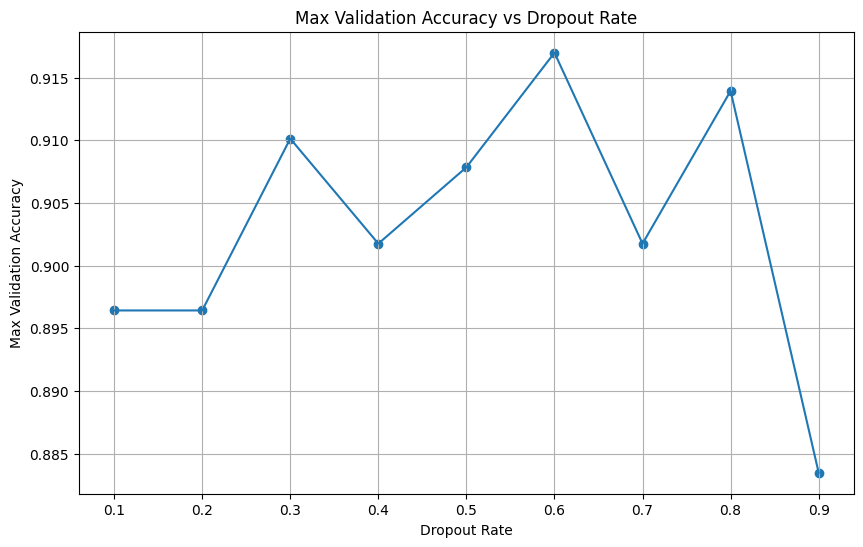

In [ ]:
# Load the search results from the pickle file
with open('drive/MyDrive/lssds24/codelatam/saved_search_results_3.pkl', 'rb') as f:
    search_dict = pickle.load(f)

# Extract dropout rates and max validation accuracies
dropout_rates = []
max_val_accuracies = []
for key, value in search_dict.items():
    dropout = float(key.split('_')[3])
    max_val_acc = max(value['val_acc'])
    dropout_rates.append(dropout)
    max_val_accuracies.append(max_val_acc)

# Sort dropout rates and corresponding accuracies
sorted_indices = sorted(range(len(dropout_rates)), key=lambda i: dropout_rates[i])
dropout_rates = [dropout_rates[i] for i in sorted_indices]
max_val_accuracies = [max_val_accuracies[i] for i in sorted_indices]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(dropout_rates, max_val_accuracies)
plt.scatter(dropout_rates, max_val_accuracies)
plt.xlabel('Dropout Rate')
plt.ylabel('Max Validation Accuracy')
plt.title('Max Validation Accuracy vs Dropout Rate')
plt.grid(True)
plt.savefig('drive/MyDrive/lssds24/codelatam/max_val_acc_vs_dropout_2.png', dpi=200, bbox_inches='tight')
plt.show()

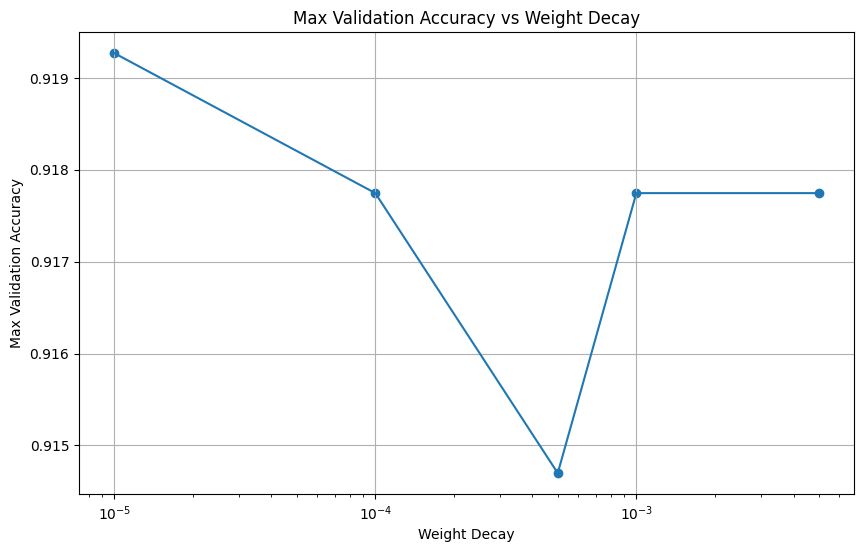

In [ ]:
# Load the search results from the pickle file
with open('drive/MyDrive/lssds24/codelatam/saved_search_results_4.pkl', 'rb') as f:
    search_dict = pickle.load(f)

# Extract weight decay and max validation accuracies
weight_decays = []
max_val_accuracies = []
for key, value in search_dict.items():
    wd = float(key.split('_')[-1])
    max_val_acc = max(value['val_acc'])
    weight_decays.append(wd)
    max_val_accuracies.append(max_val_acc)

# Sort weight decays and corresponding accuracies
sorted_indices = sorted(range(len(weight_decays)), key=lambda i: weight_decays[i])
weight_decays = [weight_decays[i] for i in sorted_indices]
max_val_accuracies = [max_val_accuracies[i] for i in sorted_indices]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(weight_decays, max_val_accuracies)
plt.scatter(weight_decays, max_val_accuracies)
plt.xscale('log')  # Use a logarithmic scale for the x-axis
plt.xlabel('Weight Decay')
plt.ylabel('Max Validation Accuracy')
plt.title('Max Validation Accuracy vs Weight Decay')
plt.grid(True)
plt.savefig('drive/MyDrive/lssds24/codelatam/max_val_acc_vs_wd.png', dpi=200, bbox_inches='tight')
plt.show()

In [ ]:
# !pip install -q tensorboard

In [ ]:
# # prompt: run tensorboard
# %load_ext tensorboard
# %tensorboard --logdir runs

## Train results

In [29]:
# Load the plotting data of the last run from the pickle file
with open('drive/MyDrive/lssds24/codelatam/plot_results.pkl', 'rb') as f:
    plots_dict = pickle.load(f)

for key, values in plots_dict.items():
  t_loss, t_acc, t_f1, v_loss, v_acc, v_f1 = values

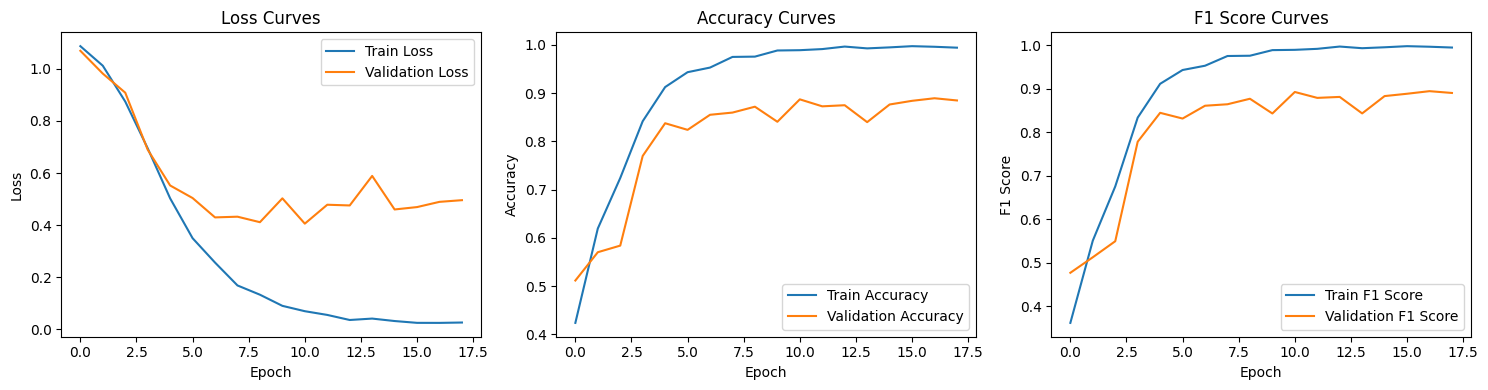

In [30]:
# Create a 1x3 grid of subplots
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Plot Loss
axes[0].plot(t_loss, label='Train Loss')
axes[0].plot(v_loss, label='Validation Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Loss Curves')
axes[0].legend()

# Plot Accuracy
axes[1].plot(t_acc, label='Train Accuracy')
axes[1].plot(v_acc, label='Validation Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Accuracy Curves')
axes[1].legend()

# Plot F1 Score
axes[2].plot(t_f1, label='Train F1 Score')
axes[2].plot(v_f1, label='Validation F1 Score')
axes[2].set_xlabel('Epoch')
axes[2].set_ylabel('F1 Score')
axes[2].set_title('F1 Score Curves')
axes[2].legend()

# Adjust spacing between subplots
plt.tight_layout()
plt.savefig('drive/MyDrive/lssds24/codelatam/training.png', dpi=200, bbox_inches='tight')
# Show the plot
plt.show()

In [1]:
# Log loss
fig, axes = plt.subplots(figsize=(6, 4))

# Plot Loss
axes.plot(t_loss, label='Train Loss')
axes.plot(v_loss, label='Validation Loss')
axes.set_yscale('log')
axes.set_xlabel('Epoch')
axes.set_ylabel('Log-Loss')
axes.set_title('Loss Curves')
axes.legend()
plt.savefig('drive/MyDrive/lssds24/codelatam/log-loss.png', dpi=200, bbox_inches='tight')

NameError: name 'plt' is not defined

### Inference

In [28]:
# load best_model.pth, set to eval_mode
# carpeta compartida de Juan para cargar archivo de modelo "best_model.pth"
# https://drive.google.com/drive/folders/1I9gk_JM-oFOD4xplydMrtrNrqHZeU0Jo?usp=sharing


model.load_state_dict(torch.load('drive/MyDrive/lssds24/codelatam/best_model.pth')['model'])
classifier.load_state_dict(torch.load('drive/MyDrive/lssds24/codelatam/best_model.pth')['classifier'])
model.eval()
classifier.eval()

outputs = []
with torch.no_grad():
    for batch_data in test_dataloader:
        outputs.append(predict_step(batch_data, model, processor, classifier, device))

<ipython-input-28-7207d45d4b5c>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('drive/MyDrive/lssds24/codelatam/best_model.pth')['model'])

In [29]:
outputs[0].keys()

dict_keys(['id', 'y_pred', 'y_pred_prob', 'y_true'])

In [30]:
keys = outputs[0].keys()
outputs_dict = {key: [] for key in keys}

for i in range(len(outputs)):
    for key in keys:
        outputs_dict[key].append(outputs[i][key])

outputs_dict = {key: np.concatenate(values) for key, values in outputs_dict.items()}
outputs_dict

{'id': array(['sn2002es_2_0_26.7_2356_213_COPY', 'sn2005eq_1_0_-8.3_3601',
        'sn2002cx_4_0_24.0_3792_369_COPY', ...,
        'sn2011dh_8_1_-16.6_4528149_COPY',
        'sn2004aw_12_2_30.2_2923126_COPY',
        'sn2004aw_12_2_1.9_2910182_COPY'], dtype='<U32'),
 'y_pred': array([1, 0, 1, ..., 2, 2, 2]),
 'y_pred_prob': array([[6.6669825e-03, 9.8316956e-01, 1.0163520e-02],
        [9.7891164e-01, 1.9604765e-02, 1.4835926e-03],
        [3.5536950e-03, 9.9488926e-01, 1.5569855e-03],
        ...,
        [9.7820885e-04, 1.7673217e-03, 9.9725455e-01],
        [1.1863629e-03, 1.7427208e-03, 9.9707091e-01],
        [1.3273058e-03, 2.9976605e-03, 9.9567503e-01]], dtype=float32),
 'y_true': array([1, 1, 1, ..., 2, 2, 2])}

In [31]:
outputs_dict['y_true'] = [inv_dict_mapping_classes[val] for val in outputs_dict['y_true']]
outputs_dict['y_pred'] = [inv_dict_mapping_classes[val] for val in outputs_dict['y_pred']]

In [32]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(outputs_dict['y_true'], outputs_dict['y_pred'], digits=4))

              precision    recall  f1-score   support

     Ia-norm     0.8768    0.9368    0.9059       380
      Ia-pec     0.6560    0.6424    0.6491       288
      Others     0.8427    0.7979    0.8197       376

    accuracy                         0.8056      1044
   macro avg     0.7919    0.7924    0.7915      1044
weighted avg     0.8036    0.8056    0.8040      1044



### Confusion matrix

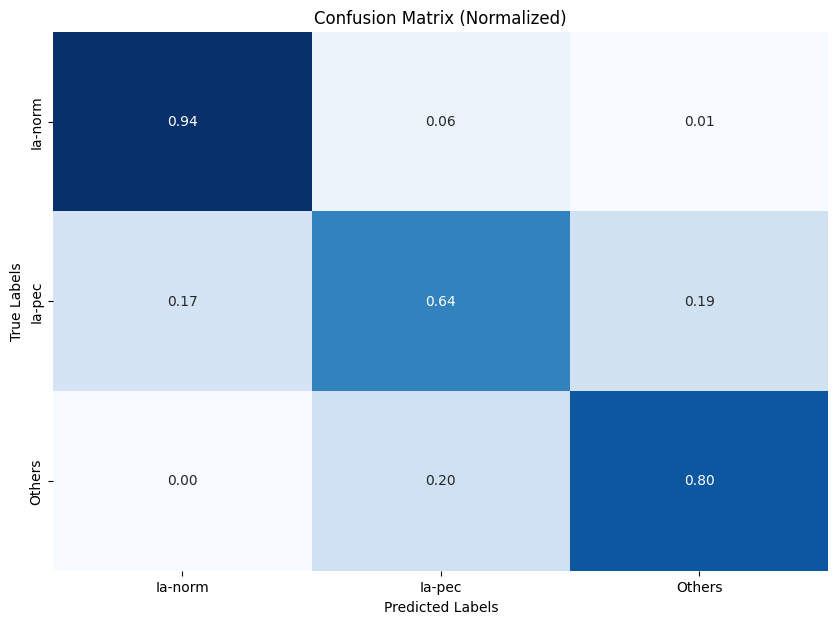

In [33]:
# plot confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have 'outputs_dict' with 'y_true' and 'y_pred'

# Crear la matriz de confusión
cm = confusion_matrix(outputs_dict['y_true'], outputs_dict['y_pred'])

# Normalizar la matriz de confusión por filas (verdaderos)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Obtener los nombres de las clases desde el diccionario
class_names = inv_dict_mapping_classes.values()

# Dibujar el heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Normalized)')
plt.savefig('drive/MyDrive/lssds24/codelatam/confusion_matrix.png', dpi=200, bbox_inches='tight')
plt.show()

In [34]:
subtype_mapping = {0: 'Ia-norm',
                   1: 'Ia-91T',
                   2: 'Ia-91bg',
                   3: 'Ia-csm',
                   4: 'Iax',
                   5: 'Ia-pec',
                   6: 'Ib-norm',
                   7: 'Ibn',
                   8: 'IIb',
                   9: 'Ib-pec',
                   10: 'Ic-norm',
                   11: 'Ic-broad',
                   12: 'Ic-pec',
                   13: 'IIP',
                   14: 'IIL',
                   15: 'IIn',
                   16: 'II-pec'}

### Missclassified images

In [35]:
# identify which Ia-norm images were missclassified
missclassified_ia_norm_as_ia_pec_images = []
missclassified_ia_norm_as_others_images = []
for i in range(len(outputs_dict['y_true'])):
  if outputs_dict['y_true'][i] == 'Ia-norm' and outputs_dict['y_pred'][i] == 'Ia-pec':
    missclassified_ia_norm_as_ia_pec_images.append(outputs_dict['id'][i])
  if outputs_dict['y_true'][i] == 'Ia-norm' and outputs_dict['y_pred'][i] == 'Others':
    missclassified_ia_norm_as_others_images.append(outputs_dict['id'][i])

print("Missclassified Ia-norm as Ia-pec images:")
print(missclassified_ia_norm_as_ia_pec_images)

print("Missclassified Ia-norm as Others images:")
print(missclassified_ia_norm_as_others_images)

Missclassified Ia-norm as Ia-pec images:
['sn94D_0_0_26.2_148', 'sn98bu_0_0_279.684_1598', 'sn1992A_0_0_225.0_773', 'sn2006cc_0_0_-9.7_2103', 'sn1996C_0_0_7.8_2619', 'sn02cs_0_0_84.321_1320', 'sn98bu_0_0_235.773_1597', 'sn2002de_0_0_-5.0_457', 'sn2002de_0_0_-4.1_458', 'sn94D_0_0_-5.6_124', 'sn06cf_0_0_11.118_2900', 'sn2003cg_0_0_1.0_797', 'sn95D_0_0_92.488_3939', 'sn2007ci_0_0_16.5_2997', 'sn2001ex_0_0_-3.4_1419', 'sn1998co_0_0_24.6_1296', 'sn2006le_0_0_-11.7_3082', 'sn1998co_0_0_28.4_1297', 'sn98bu_0_0_1.2_1909', 'sn1994T_0_0_0.8_3872', 'sn2003cg_0_0_382.6_821', 'sn2007ci_0_0_21.4_2999']
Missclassified Ia-norm as Others images:
['sn2003cg_0_0_-8.9_780', 'sn2002eu_0_0_60.7_3453']


In [36]:
# make the plot in a nxn grid
import matplotlib.pyplot as plt
def plot_missclassified_images(image_ids, root_dir, subfolder, ncols=3):
  """Plots missclassified images from a list of image IDs in a grid.

  Args:
      image_ids: A list of image IDs.
      root_dir: The root directory where the images are stored.
      subfolder: The subfolder within the root directory where the images are stored.
      ncols: Number of columns in the grid.
  """

  nrows = (len(image_ids) + ncols - 1) // ncols  # Calculate the number of rows needed
  fig, axes = plt.subplots(nrows, ncols, figsize=(15, 3 * nrows))

  for i, image_id in enumerate(image_ids):
    image_path = os.path.join(root_dir, subfolder, image_id + ".png")
    if os.path.exists(image_path):
      img = plt.imread(image_path)
      row = i // ncols
      col = i % ncols
      axes[row, col].imshow(img)
      axes[row, col].set_title(f"Missclassified Image: {image_id}\n Subtype: {subtype_mapping[int(image_id.split('_')[1])]}")
      axes[row, col].axis('off')  # Turn off axis labels and ticks
  # Remove any empty subplots
  for i in range(len(image_ids), nrows * ncols):
    row = i // ncols
    col = i % ncols
    fig.delaxes(axes[row, col])

  plt.tight_layout()
  plt.show()


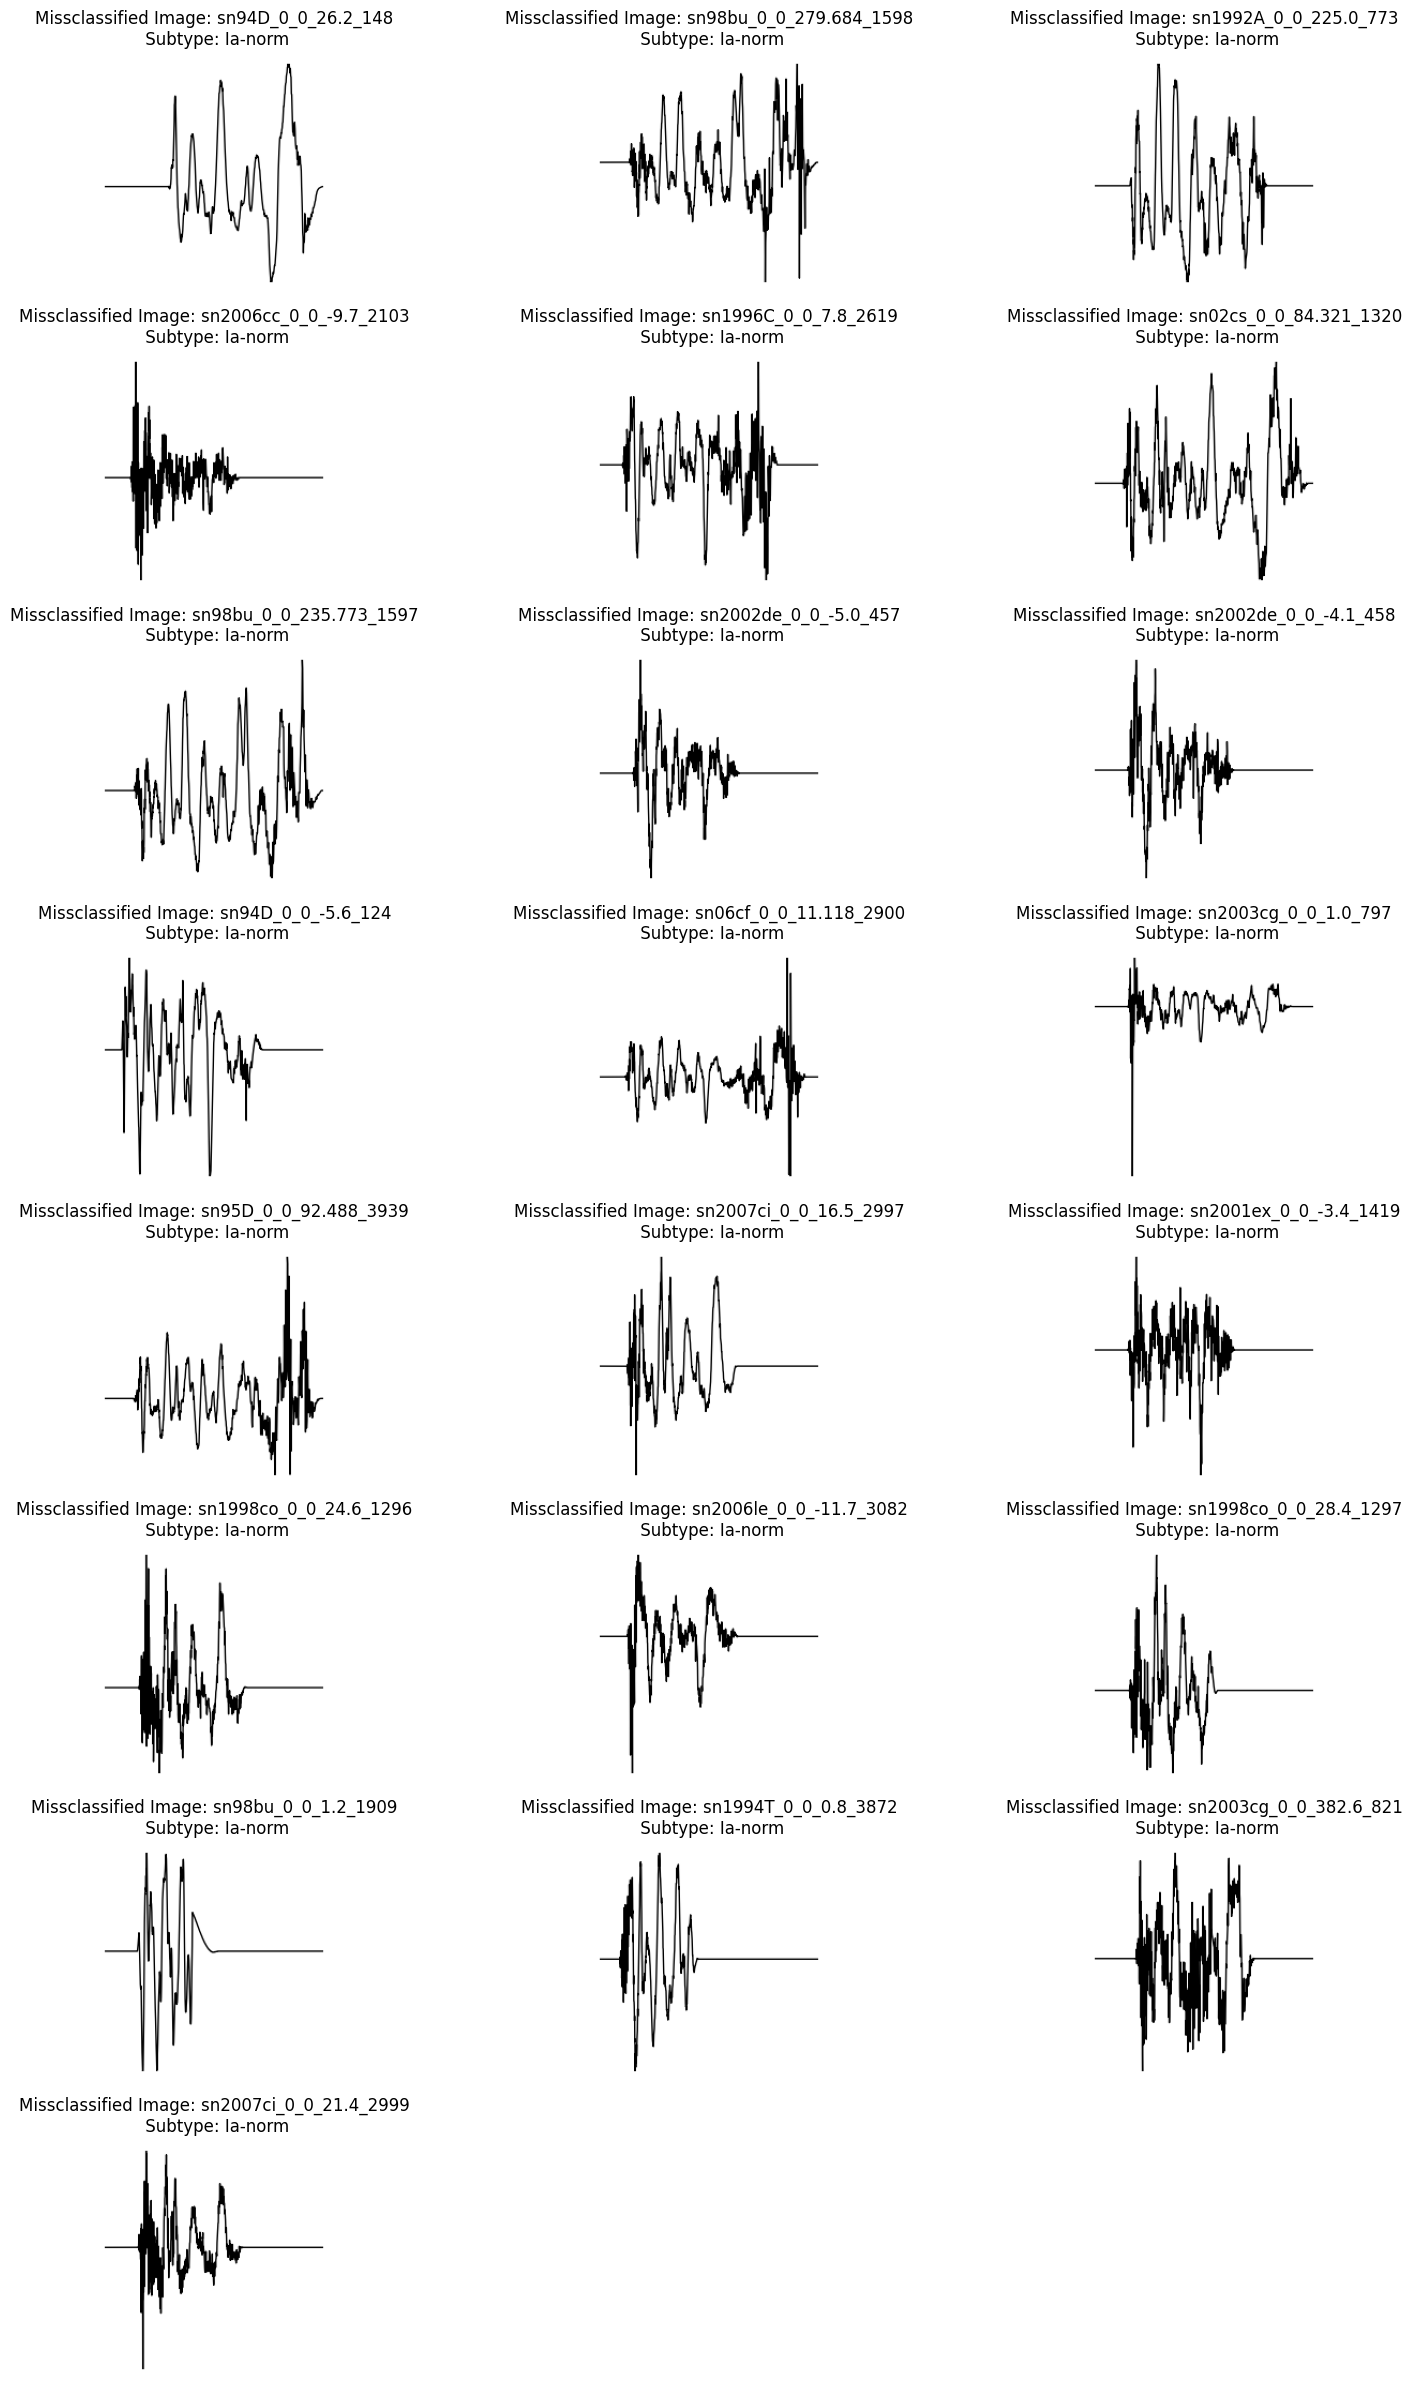

In [37]:
# Plot the Ia-norm missclassified as ia-pec
plot_missclassified_images(missclassified_ia_norm_as_ia_pec_images, root_dir, "0", ncols=3)

In [38]:
# identify which Ia-pec images were missclassified as Ia-norm
missclassified_ia_pec_as_ia_norm_images = []
for i in range(len(outputs_dict['y_true'])):
  if outputs_dict['y_true'][i] == 'Ia-pec' and outputs_dict['y_pred'][i] == 'Ia-norm':
    missclassified_ia_pec_as_ia_norm_images.append(outputs_dict['id'][i])

print("Missclassified Ia-pec as Ia-norm images:")
print(missclassified_ia_pec_as_ia_norm_images)

Missclassified Ia-pec as Ia-norm images:
['sn2005eq_1_0_-8.3_3601', 'sn08ds_1_0_21.426_3755', 'sn2001V_1_0_20.3_2082_17_COPY', 'sn2001V_1_0_20.3_2082', 'sn2002hu_1_0_21.5_2407', 'sn2001V_1_0_22.2_2085', 'sn2005eq_1_0_53.7_3610_54_COPY', 'sn2001V_1_0_19.1_2080', 'sn2001V_1_0_78.2_2100', 'sn2001V_1_0_12.5_2077', 'sn2001V_1_0_49.7_2094_3_COPY', 'sn2002hu_1_0_21.5_2407_65_COPY', 'sn2005eq_1_0_14.0_3606', 'sn08ds_1_0_51.911_3756', 'sn2001V_1_0_11.3_2076', 'sn2001V_1_0_20.3_2082_14_COPY', 'sn2001V_1_0_24.1_2087', 'sn08ds_1_0_78.227_3759', 'sn2001V_1_0_23.1_2086', 'sn2001V_1_0_18.2_2079', 'sn2001V_1_0_21.1_2083', 'sn1999gp_1_0_4.9_2663', 'sn08ds_1_0_56.774_3757_7_COPY', 'sn2001V_1_0_27.0_2088', 'sn2001V_1_0_9.5_2074', 'sn2001V_1_0_47.8_2092', 'sn2001V_1_0_13.5_2078', 'sn2001V_1_0_24.1_2087_1_COPY', 'sn2005eq_1_0_53.7_3610_12_COPY', 'sn2001V_1_0_21.3_2084', 'sn08ds_1_0_63.437_3758', 'sn08ds_1_0_56.774_3757', 'sn1999gp_1_0_49.7_2667', 'sn1999gp_1_0_6.9_2664', 'sn2001V_1_0_20.3_2082_27_COPY', 's

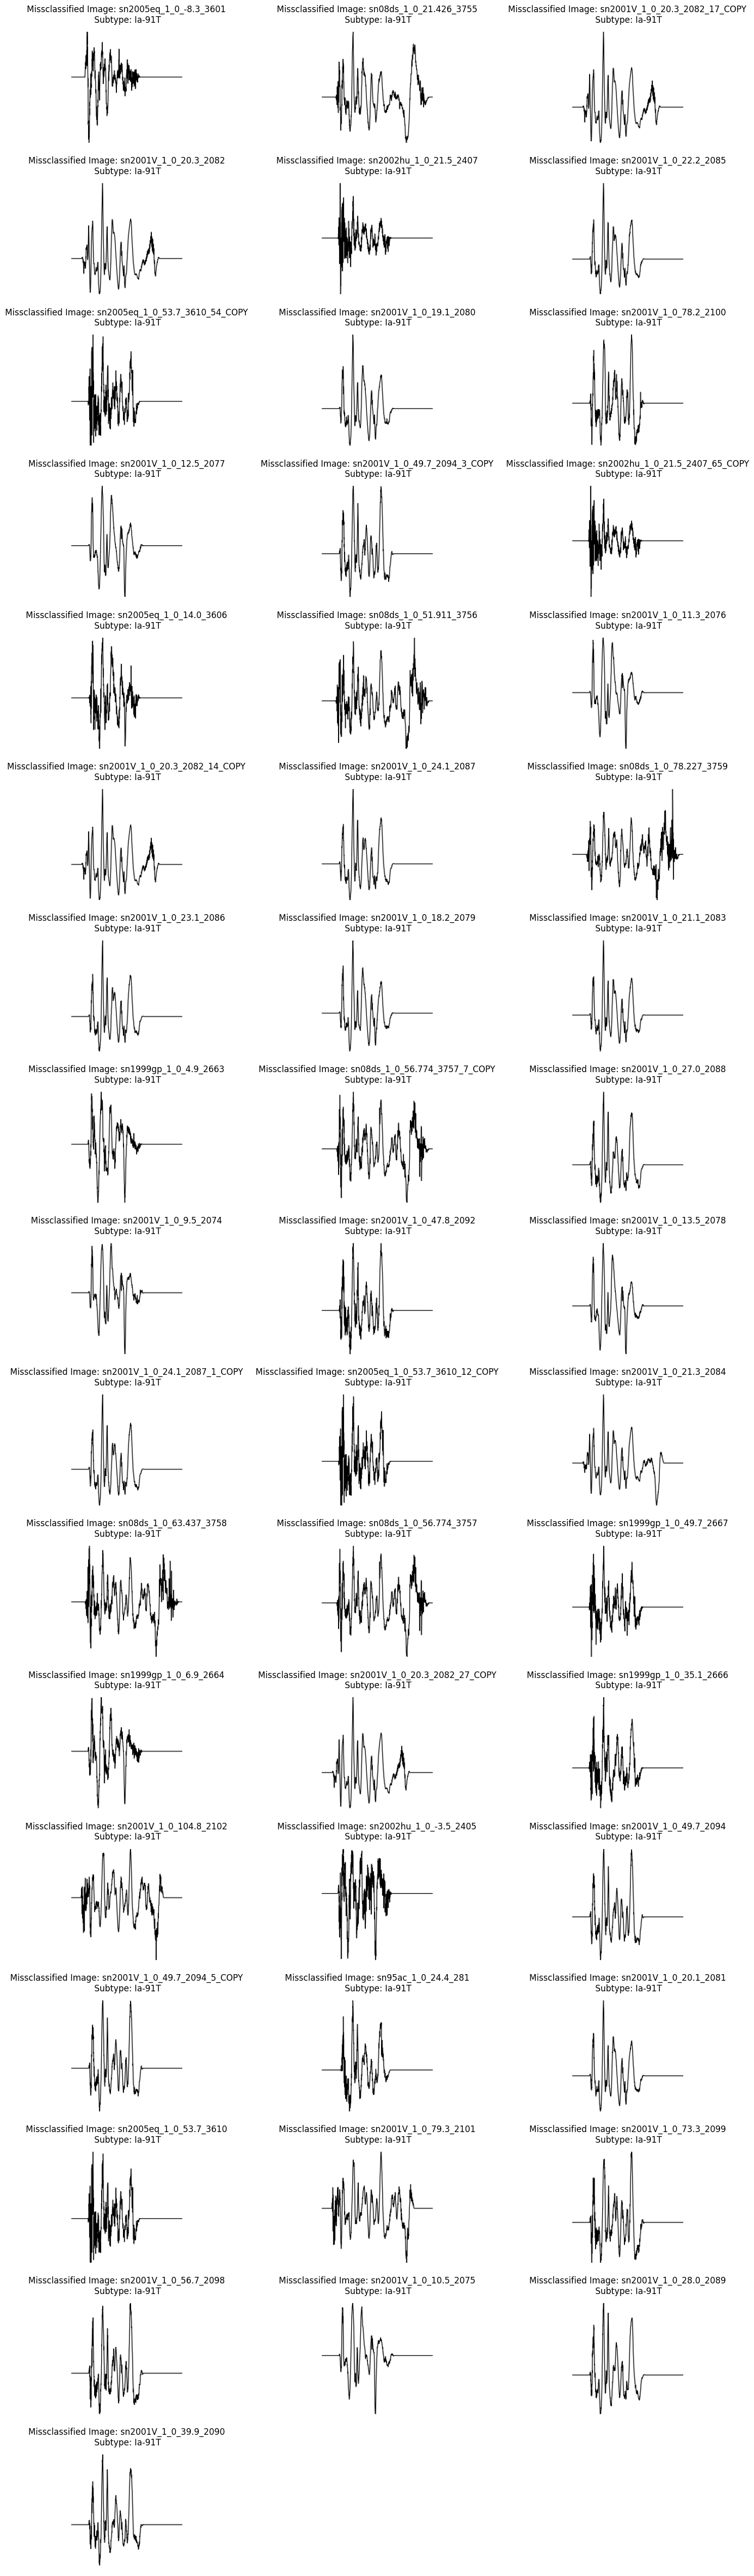

In [39]:
plot_missclassified_images(missclassified_ia_pec_as_ia_norm_images, root_dir, "1", ncols=3)

In [46]:
# check how many Ia-91T are in test set, also save phases
Ia91t_in_test = []
phases = []
for i in splits['1']['test']:
  a = i.split('_')[1]
  if a == '1':
    Ia91t_in_test.append(i.split('_')[0])
    phases.append(float(i.split('_')[3]))
print(list(set(Ia91t_in_test)))
print('Ia-91T in test set:', len(Ia91t_in_test))
print('Ia-91T missclassified:', len(missclassified_ia_pec_as_ia_norm_images))

['sn2001V', 'sn1999gp', 'sn08ds', 'sn95ac', 'sn2002hu', 'sn2005eq']
Ia-91T in test set: 92
Ia-91T missclassified: 49


In [47]:
miss_phases = []
for image_name in missclassified_ia_pec_as_ia_norm_images:
  miss_phases.append(float(image_name.split('_')[3]))

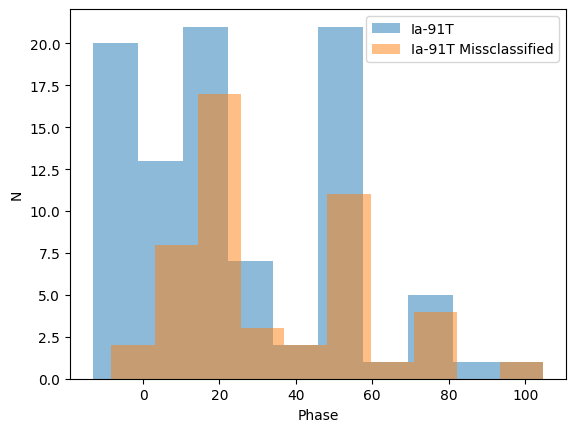

In [53]:
plt.hist(phases, alpha=0.5, label='Ia-91T')
plt.hist(miss_phases, alpha=0.5, label='Ia-91T Missclassified')
plt.xlabel('Phase')
plt.ylabel('N')
plt.legend()
plt.savefig('drive/MyDrive/lssds24/codelatam/Ia-91T-phases-histogram.png', dpi=200, bbox_inches='tight')
plt.show()